In [3]:
!mkdir -p ~/.kaggle
!mv "/content/drive/MyDrive/kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Collect CREMA-D audio dataset from Kaggle into a folder called 'cremad'
!kaggle datasets download -d ejlok1/cremad --unzip -p cremad

# Collect RAVDESS audio dataset from Kaggle into a folder called 'ravdess'
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio --unzip -p ravdess

# Collect TESS audio dataset from Kaggle
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess --unzip

# Collect SAVEE audio dataset from Kaggle into a folder called 'savee'
!kaggle datasets download -d ejlok1/surrey-audiovisual-expressed-emotion-savee --unzip -p savee

Dataset URL: https://www.kaggle.com/datasets/ejlok1/cremad
License(s): ODC Attribution License (ODC-By)
 97% 438M/451M [00:01<00:00, 286MB/s]
100% 451M/451M [00:01<00:00, 331MB/s]
Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
 96% 411M/429M [00:00<00:00, 429MB/s]
100% 429M/429M [00:02<00:00, 155MB/s]
Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 92% 393M/428M [00:00<00:00, 443MB/s]
100% 428M/428M [00:00<00:00, 481MB/s]
Dataset URL: https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee
License(s): copyright-authors
  0% 0.00/107M [00:00<?, ?B/s]
100% 107M/107M [00:00<00:00, 1.33GB/s]


In [5]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
# This allows normalization for the specgrams which allows for clearer visualizations
from matplotlib.colors import Normalize
import seaborn as sns

import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Put the ravdess directory in a list
ravdess = os.listdir('/content/drive/MyDrive/ravdess/audio_speech_actors_01-24/')
# Make a list for emotion labels and a list for path to audio files
emotions = []
paths = []
# Loop through all the actor directories in audio_speech_actors_01-24
for dir in ravdess:
    # Loop through all the files in each directory
    for file in os.listdir('/content/drive/MyDrive/ravdess/audio_speech_actors_01-24/' + dir):
        # Extract the emotion label from the file name
        emotion = file.split('-')[2]
        if emotion == '01':
            emotion = 'neutral'
        elif emotion == '02':
            emotion = 'calm'
        elif emotion == '03':
            emotion = 'happiness'
        elif emotion == '04':
            emotion = 'sadness'
        elif emotion == '05':
            emotion = 'anger'
        elif emotion == '06':
            emotion = 'fear'
        elif emotion == '07':
            emotion = 'disgust'
        elif emotion == '08':
            emotion = 'surprise'
        else:
            emotion = 'Unknown'
        # Extract the path
        path = '/content/drive/MyDrive/ravdess/audio_speech_actors_01-24/' + dir + '/' + file
        # Append the emotion and path to their lists
        emotions.append(emotion)
        paths.append(path)

In [7]:
ravdess_df = pd.DataFrame(emotions,columns=['Emotions'])
#
ravdess_df['Paths'] = paths
#
ravdess_df

,Emotions,Paths
0,anger,/content/drive/MyDrive/ravdess/audio_speech_ac...
1,happiness,/content/drive/MyDrive/ravdess/audio_speech_ac...
2,sadness,/content/drive/MyDrive/ravdess/audio_speech_ac...
3,sadness,/content/drive/MyDrive/ravdess/audio_speech_ac...
4,surprise,/content/drive/MyDrive/ravdess/audio_speech_ac...
...,...,...
1435,fear,/content/drive/MyDrive/ravdess/audio_speech_ac...
1436,disgust,/content/drive/MyDrive/ravdess/audio_speech_ac...
1437,surprise,/content/drive/MyDrive/ravdess/audio_speech_ac...
1438,sadness,/content/drive/MyDrive/ravdess/audio_speech_ac...


In [10]:
# Put the cremad directory in a list
cremad = os.listdir('/content/drive/MyDrive/cremad/AudioWAV/')
# Make a list for emotion labels and a list for path to audio files
emotions = []
paths = []
# Loop through all the files and extract the emotion label and path
for file in cremad:
    # Extract the emotion label from the file name
    emotion = file.split('_')[2]
    if emotion == 'SAD':
        emotion = 'sadness'
    elif emotion == 'ANG':
        emotion = 'anger'
    elif emotion == 'DIS':
        emotion = 'disgust'
    elif emotion == 'FEA':
        emotion = 'fear'
    elif emotion == 'HAP':
        emotion = 'happiness'
    elif emotion == 'NEU':
        emotion = 'neutral'
    elif emotion == 'SUR':
        emotion = 'surprise'
    else:
        emotion = 'Unknown'
    # Extract the path
    path = '/content/drive/MyDrive/cremad/AudioWAV/' + file
    # Append the emotion and path to their lists
    emotions.append(emotion)
    paths.append(path)

In [11]:
cremad_df = pd.DataFrame(emotions, columns = ['Emotions'])

In [12]:
cremad_df['Paths'] = paths

In [13]:
cremad_df.head()

,Emotions,Paths
0,anger,/content/drive/MyDrive/cremad/AudioWAV/1058_IW...
1,sadness,/content/drive/MyDrive/cremad/AudioWAV/1029_IO...
2,sadness,/content/drive/MyDrive/cremad/AudioWAV/1021_IE...
3,anger,/content/drive/MyDrive/cremad/AudioWAV/1020_IE...
4,fear,/content/drive/MyDrive/cremad/AudioWAV/1091_TI...


In [14]:
savee= os.listdir('/content/drive/MyDrive/savee/ALL/')

emotions = []
paths = []

for file in savee:
    emotion = file.split('.')[0]
    emotion = emotion.split('_')[1]
    emotion = emotion[:-2]
    if emotion == 'a':
      emotion = 'anger'
    elif emotion == 'd':
        emotion = 'disgust'
    elif emotion == 'f':
        emotion = 'fear'
    elif emotion == 'h':
        emotion = 'happiness'
    elif emotion == 'n':
        emotion = 'neutral'
    elif emotion == 'sa':
        emotion = 'sadness'
    elif emotion == 'su':
        emotion = 'surprise'
    else:
        emotion = 'Unknown'
    emotions.append(emotion)
    path = '/content/drive/MyDrive/savee/ALL/' + file
    paths.append(path)

In [15]:
savee_df = pd.DataFrame(emotions, columns = ['Emotions'])

In [16]:
savee_df['Paths'] = paths

In [17]:
# Put the tess directory in a list
tess = os.listdir('/content/drive/MyDrive/TESS Toronto emotional speech set data/')
# Make a list for emotion labels and a list for path to audio files
emotions = []
paths = []
# Loop through all the audio file directories
for dir in tess:
    # Loop through all the files in each directory
    for file in os.listdir('/content/drive/MyDrive/TESS Toronto emotional speech set data/' + dir):
        # Extract the emotion label from the file name
        emotion = file.split('.')[0]
        emotion = emotion.split('_')[2]
        if emotion == 'ps':
            emotion = 'surprise'
        elif emotion == 'sad':
            emotion = 'sadness'
        elif emotion == 'disgust':
            emotion = 'disgust'
        elif emotion == 'angry':
            emotion = 'anger'
        elif emotion == 'happy':
            emotion = 'happiness'
        elif emotion == 'neutral':
            emotion = 'neutral'
        elif emotion == 'fear':
            emotion = 'fear'
        else:
            emotion = 'Unknown'
        # Extract the path
        path = '/content/drive/MyDrive/TESS Toronto emotional speech set data/' + dir + '/' + file
        # Append the emotion and path to their lists
        emotions.append(emotion)
        paths.append(path)

In [18]:
tess_df = pd.DataFrame(emotions, columns = ['Emotions'])

In [19]:
tess_df['Paths'] = paths

In [20]:
ravdess_df.shape

(1440, 2)

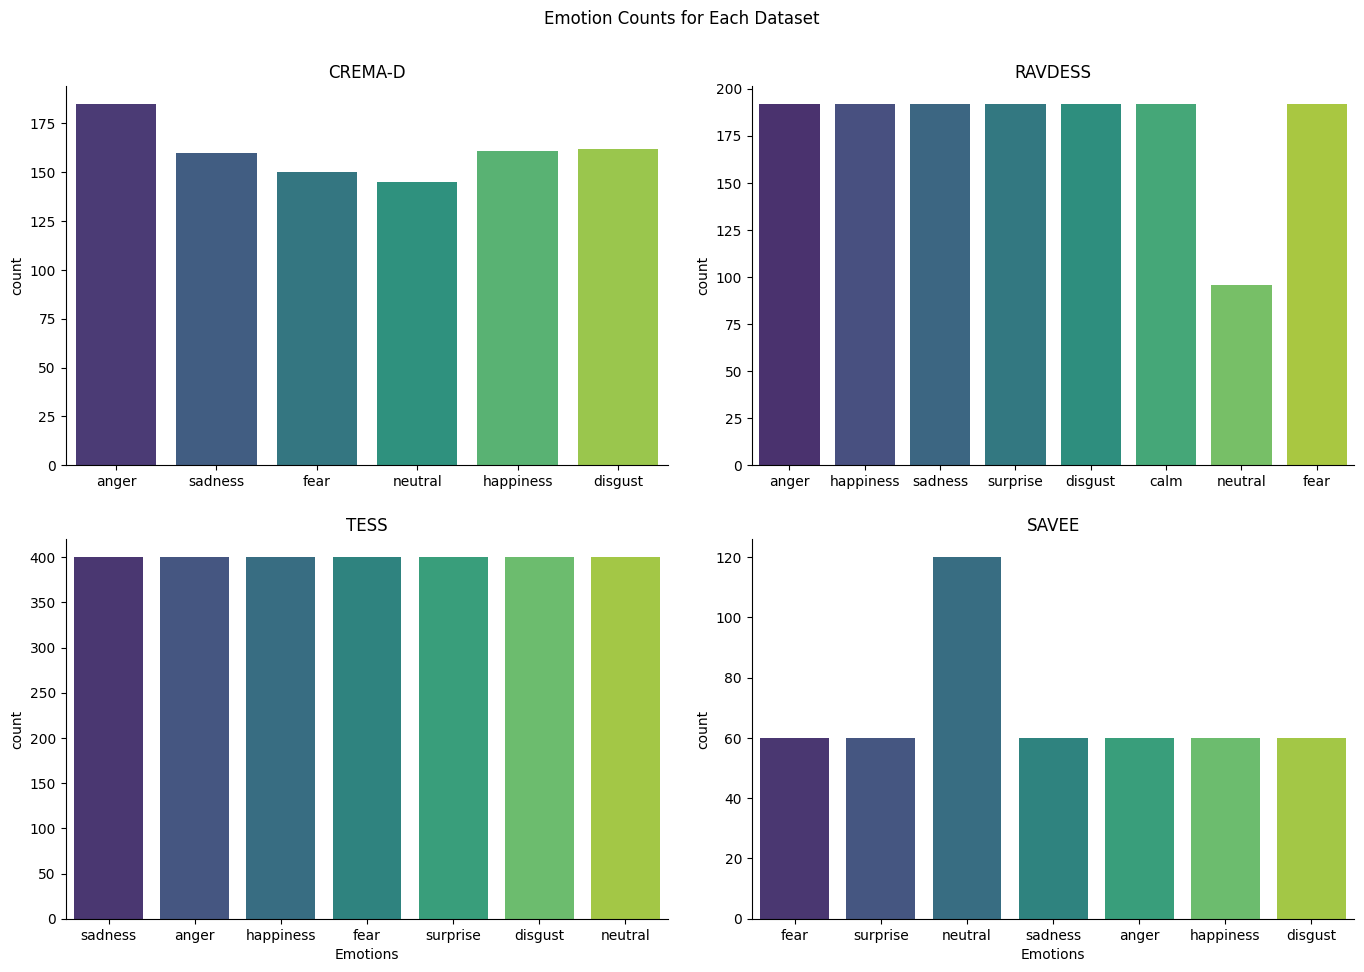

In [21]:

# Plot the value counts for each emotion in each dataset
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.countplot(cremad_df, x = cremad_df['Emotions'], palette='viridis')
plt.title('CREMA-D')
plt.xlabel('')
plt.subplot(2, 2, 2)
sns.countplot(ravdess_df, x = ravdess_df['Emotions'], palette='viridis')
plt.title('RAVDESS')
plt.xlabel('')
plt.subplot(2, 2, 3)
sns.countplot(tess_df, x = tess_df['Emotions'], palette='viridis')
plt.title('TESS')
plt.subplot(2, 2, 4)
sns.countplot(savee_df, x = savee_df['Emotions'], palette='viridis')
plt.title('SAVEE')
plt.suptitle('Emotion Counts for Each Dataset')
# Adjust the layout so there are no overlapping titles
plt.tight_layout(pad=2)
# Remove the spines
sns.despine()
plt.show()

In [22]:
# Count the number of emotions in each dataset
print('CREMA-D Emotion Counts:')
print(cremad_df['Emotions'].value_counts())
print('\nRAVDESS Emotion Counts:')
print(ravdess_df['Emotions'].value_counts())
print('\nTESS Emotion Counts:')
print(tess_df['Emotions'].value_counts())
print('\nSAVEE Emotion Counts:')
print(savee_df['Emotions'].value_counts())

CREMA-D Emotion Counts:
Emotions
anger        185
disgust      162
happiness    161
sadness      160
fear         150
neutral      145
Name: count, dtype: int64

RAVDESS Emotion Counts:
Emotions
anger        192
happiness    192
sadness      192
surprise     192
disgust      192
calm         192
fear         192
neutral       96
Name: count, dtype: int64

TESS Emotion Counts:
Emotions
sadness      400
anger        400
happiness    400
fear         400
surprise     400
disgust      400
neutral      400
Name: count, dtype: int64

SAVEE Emotion Counts:
Emotions
neutral      120
fear          60
surprise      60
sadness       60
anger         60
happiness     60
disgust       60
Name: count, dtype: int64


In [23]:
df = pd.concat([ravdess_df, tess_df, savee_df], axis = 0)

In [24]:
df.head()

,Emotions,Paths
0,anger,/content/drive/MyDrive/ravdess/audio_speech_ac...
1,happiness,/content/drive/MyDrive/ravdess/audio_speech_ac...
2,sadness,/content/drive/MyDrive/ravdess/audio_speech_ac...
3,sadness,/content/drive/MyDrive/ravdess/audio_speech_ac...
4,surprise,/content/drive/MyDrive/ravdess/audio_speech_ac...


In [25]:
df['Emotions'].value_counts()

,count
Emotions,
anger,652
happiness,652
sadness,652
surprise,652
disgust,652
fear,652
neutral,616
calm,192


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4720 entries, 0 to 479
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Emotions  4720 non-null   object
 1   Paths     4720 non-null   object
dtypes: object(2)
memory usage: 110.6+ KB


In [27]:
df.isna().sum()

,0
Emotions,0
Paths,0


In [28]:
df.shape

(4720, 2)

In [29]:
df.reset_index(inplace = True, drop = True)

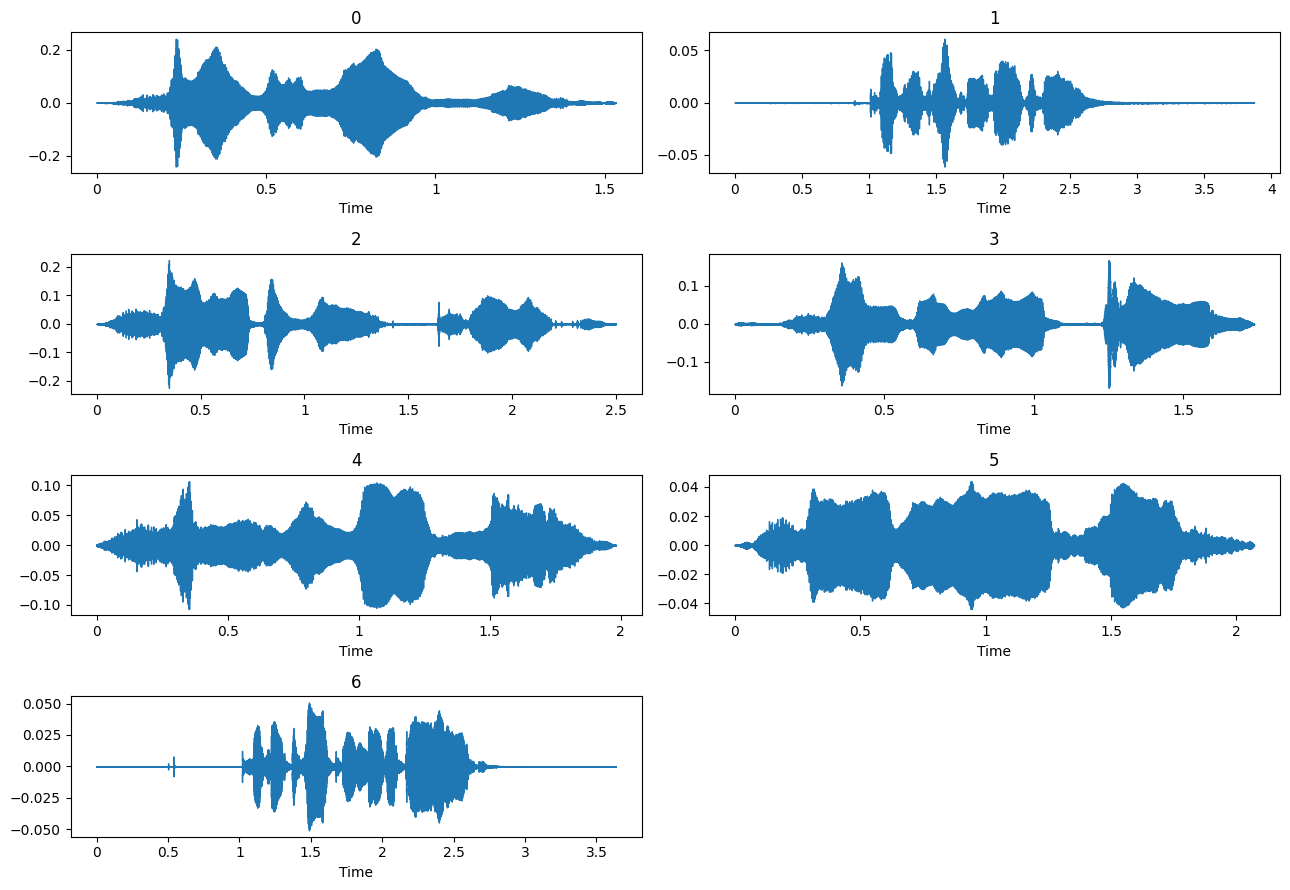

In [ ]:
sample = df.groupby('Emotions',group_keys = False).apply(lambda x: x.sample(1))

sample_path = sample['Paths'].tolist()

plt.figure(figsize = (13,9))
for i in range(7):
  plt.subplot(4,2,i+1)
  y,sr = librosa.load(sample_path[i],sr = 44100)
  librosa.display.waveshow(y, sr = sr)
  plt.title(sample['Emotions'].values[i])
plt.tight_layout()

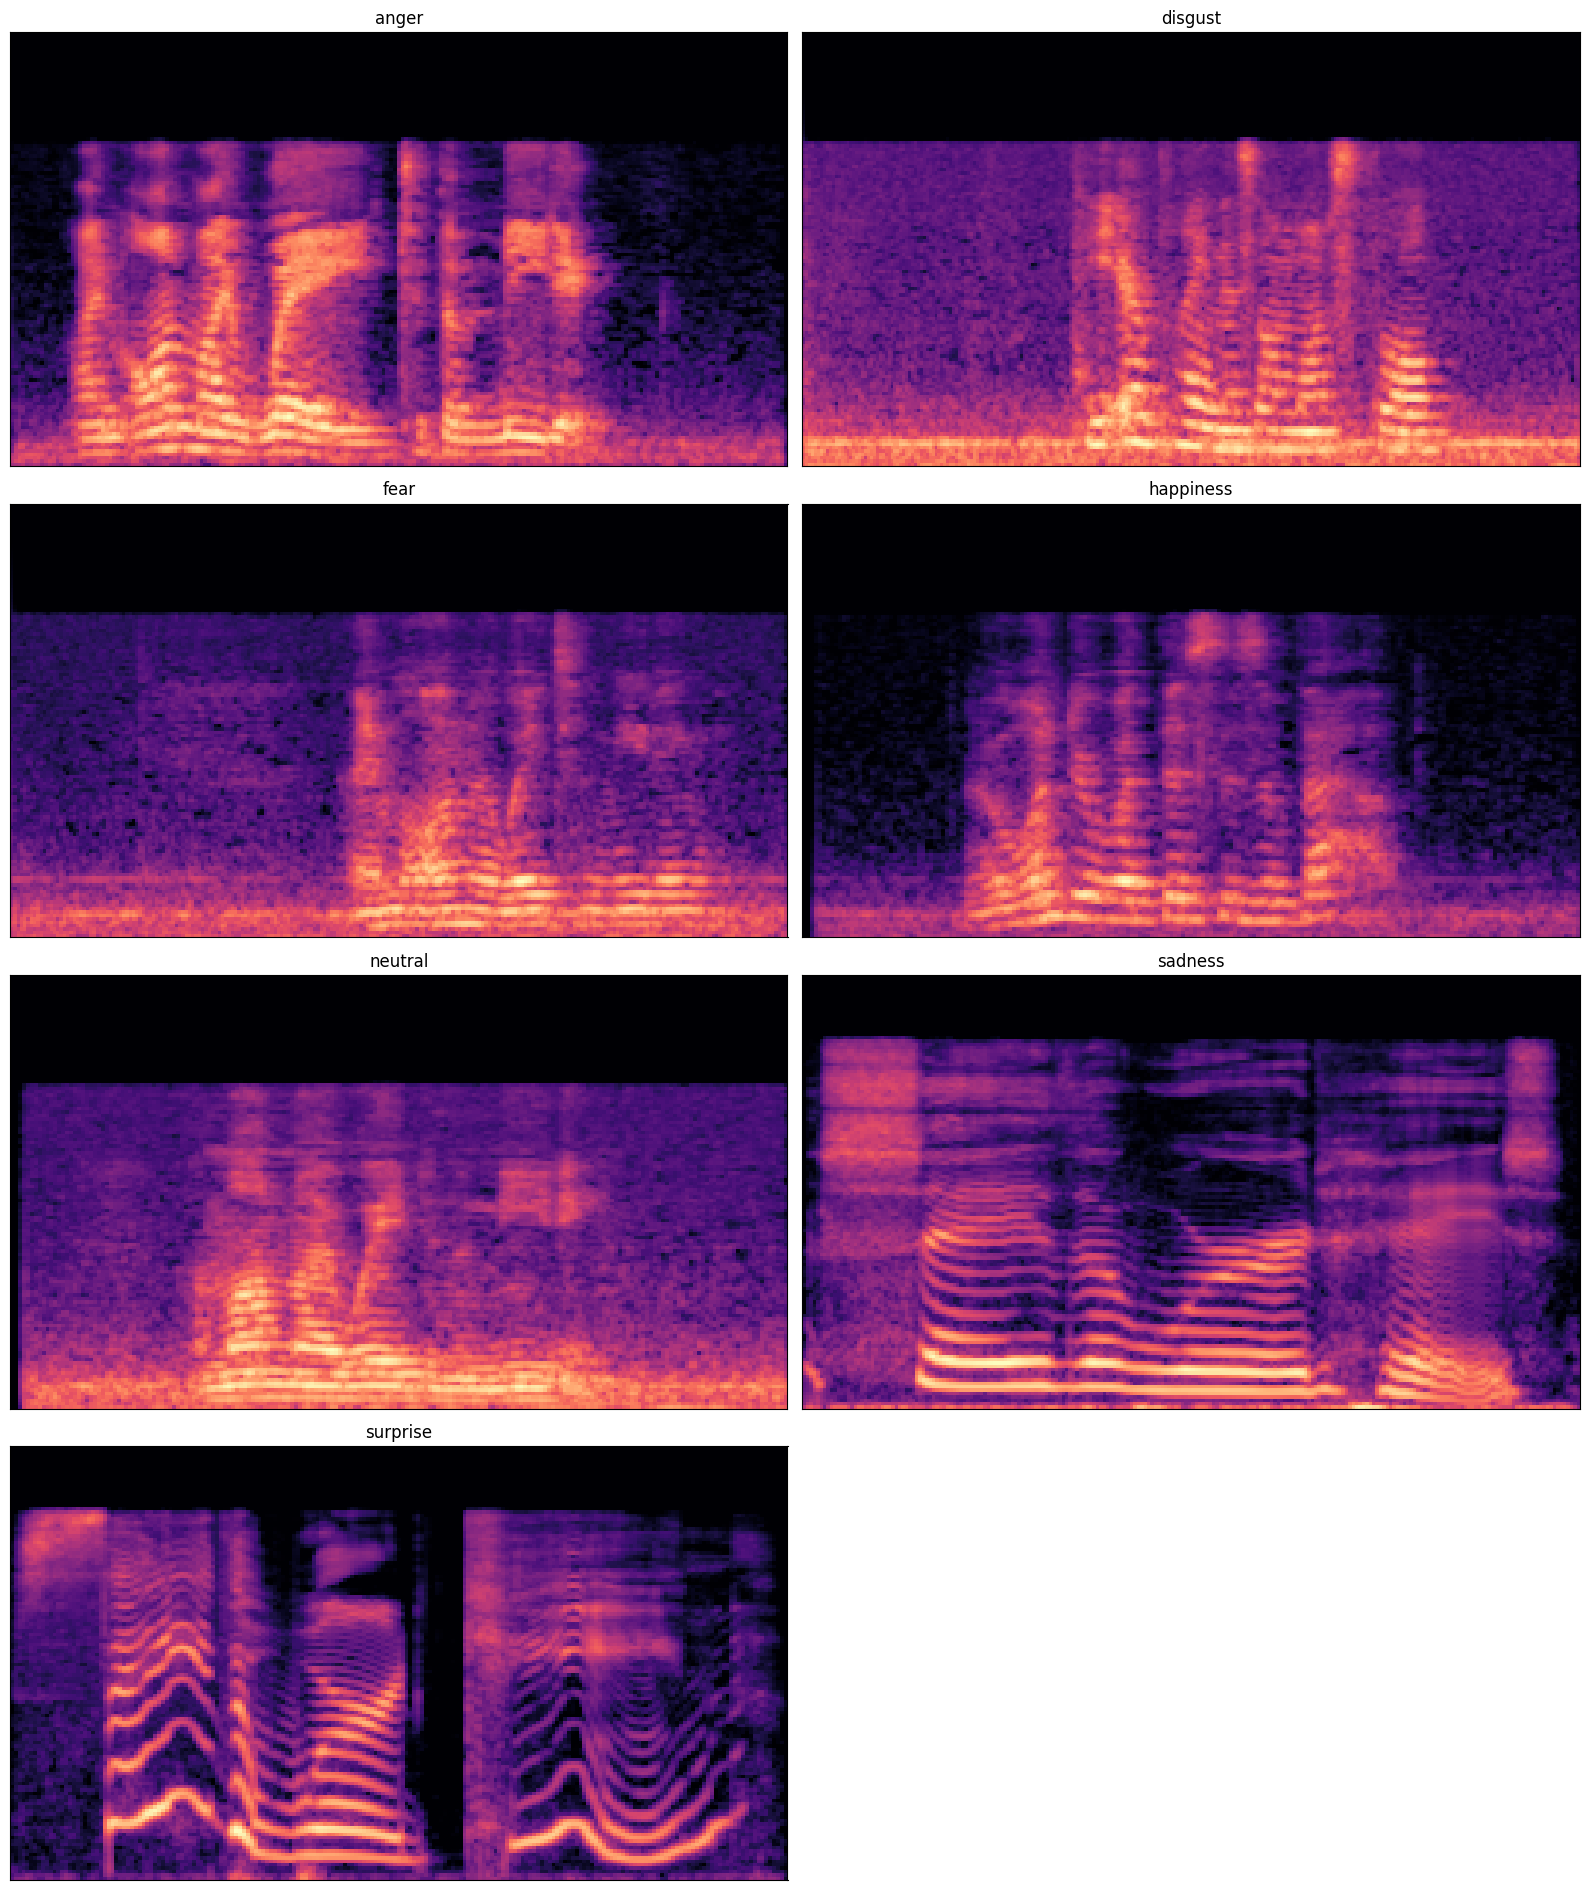

In [ ]:
plt.figure(figsize = (16,9))
for i in range(7):
  plt.subplot(4,2,i+1)
  signal,sr = librosa.load(sample_path[i],sr = 44100)
  signal = librosa.feature.melspectrogram(y = signal, sr=sr)
  mel_fcc = librosa.power_to_db(signal,ref = np.min)
  librosa.display.specshow(mel_fcc, sr = sr)
  plt.title(sample['Emotions'].values[i])
plt.tight_layout()

In [30]:
# Encode the emotion labels into numbers
encoder = LabelEncoder()
df['Emotions'] = encoder.fit_transform(df['Emotions'])
# Make sure the encoding worked
df['Emotions'].value_counts()

,count
Emotions,
0,652
4,652
6,652
7,652
2,652
3,652
5,616
1,192


In [ ]:
def process_audio(path):
    '''
    Load the audio file, convert the audio file into a mel spectrogram,
    return the mel spectrogram as an image, and convert the image into a numpy array
    '''
    # Load the audio file and set the sampling rate to 44100
    audio, sr = librosa.load(path, sr=44100, duration=4, mono=True)
    # pad the audio files that are less than 4 seconds with zeros at the end
    if len(audio) < 4 * sr:
        audio = np.pad(audio, pad_width=(0, 4 * sr - len(audio)), mode='constant')
    # Convert the audio file into a mel spectrogram
    signal = librosa.feature.melspectrogram(y = audio, sr=sr, n_mels=128)
    # Convert the spectrogram from amplitude squared to decibels
    # as amplitude does not give us much information
    signal = librosa.power_to_db(signal, ref=np.min)    # Convert the image into a numpy array
    image = np.array(signal)
    # Return the image
    return image

In [ ]:
sample_path

['/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_angry/OAF_wheat_angry.wav',
 '/content/drive/MyDrive/ravdess/audio_speech_actors_01-24/Actor_17/03-01-02-02-01-01-17.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_disgust/YAF_king_disgust.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_Fear/OAF_pain_fear.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_happy/OAF_long_happy.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_neutral/OAF_nice_neutral.wav',
 '/content/drive/MyDrive/ravdess/audio_speech_actors_01-24/Actor_18/03-01-04-01-01-02-18.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_hit_ps.wav']

Numpy array shape: (128, 345)


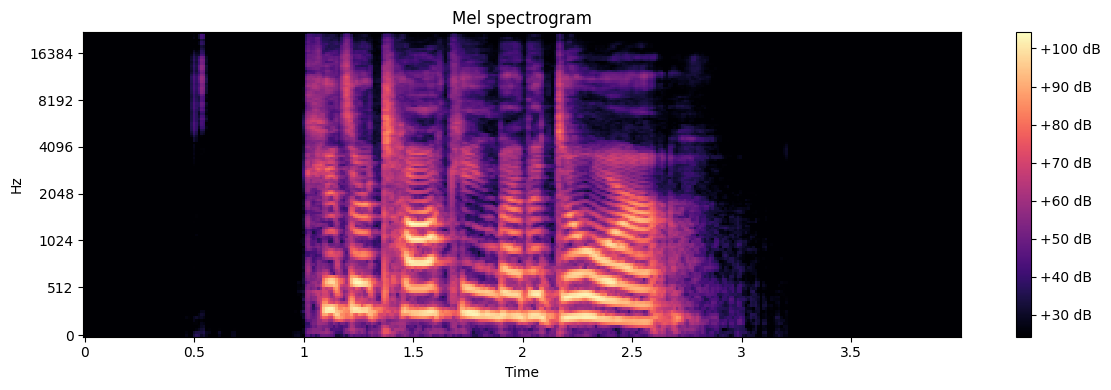

In [ ]:
image = process_audio(sample_path[6])
# Print the shape of the numpy array
print('Numpy array shape:', image.shape)
# Plot the image
plt.figure(figsize=(12, 4))
librosa.display.specshow(image, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [ ]:
# Divide the data into features and labels
X_mel = [process_audio(path) for path in df['Paths']]

In [ ]:
y_mel = df['Emotions']

In [ ]:
np.save('/content/drive/MyDrive/X_mel_3.npy', X_mel)

In [ ]:
y_mel = np.load('/content/drive/MyDrive/y_mel.npy')

In [ ]:
print("len of X_mel, ",len(X_mel))
print("len of y_mel, ",len(y_mel))


len of X_mel,  4720
len of y_mel,  4720


In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_mel, y_mel, test_size=0.2, random_state=42, shuffle = True)

In [ ]:
print("Len of X_train ", len(X_train))
print("Len of X_train ", len(X_test))

Len of X_train  3776
Len of X_train  944


In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_train = (X_train - np.mean(X_train))/np.std(X_train)
X_test = (X_test - np.mean(X_test))/np.std(X_test)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)

In [ ]:
X_train.shape

(3776, 128, 345, 1)

In [ ]:
batch_size = 32
# Make a training dataset from the training set
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# Shuffle, batch, and prefetch the data
train_ds = train_ds.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# Make a testing dataset from the testing set
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
# Shuffle, batch, and prefetch the data
test_ds = test_ds.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
model_mel = tf.keras.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 345, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Batch normalization maintains the 0 mean and 1 standard deviation
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    # Third convolutional layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    # Fourth convolutional layer
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    # Global average pooling layer averages the values in each feature map into
    # a single value and flattens the result into a (None, 256) array
    tf.keras.layers.GlobalAveragePooling2D(),
    # Dropout layer randomly sets 50% of the activations to zero
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='softmax')
])

In [ ]:
model_mel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [44]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10, restore_best_weights=True, mode = 'min')

In [45]:
lr_scheular = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5,min_lr = 0.000001,mode = 'min')

In [ ]:
histor = model_mel.fit(train_ds,epochs = 30,validation_data = test_ds,callbacks = [early_stopping,lr_scheular])

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.3249 - loss: 1.8899 - val_accuracy: 0.1282 - val_loss: 5.4867 - learning_rate: 0.0010
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.5047 - loss: 1.4142 - val_accuracy: 0.2044 - val_loss: 6.4042 - learning_rate: 0.0010
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.5705 - loss: 1.2073 - val_accuracy: 0.1716 - val_loss: 5.7527 - learning_rate: 0.0010
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.6305 - loss: 1.0486 - val_accuracy: 0.2998 - val_loss: 3.4638 - learning_rate: 0.0010
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.6831 - loss: 0.9359 - val_accuracy: 0.3411 - val_loss: 2.3872 - learning_rate: 0.0010
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.7147 - loss: 0.8574 - val_accuracy: 0.5318 - val_loss: 1.4412 - learning_rate: 0.0010
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.7380 - loss: 0

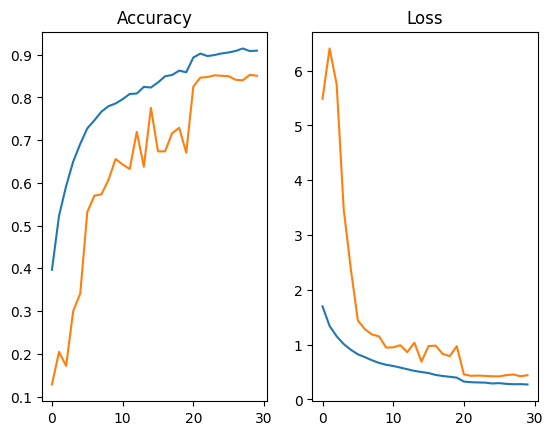

In [ ]:
plt.subplot(1,2,1)
plt.plot(histor.history['accuracy'])
plt.plot(histor.history['val_accuracy'])
plt.title("Accuracy")
plt.subplot(1,2,2)
plt.plot(histor.history['loss'])
plt.plot(histor.history['val_loss'])
plt.title("Loss")

plt.show()

In [ ]:
y_pred = model_mel.predict(X_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [ ]:
y_pred = np.argmax(y_pred,axis = 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       129
           1       0.76      0.67      0.72        43
           2       0.91      0.87      0.89       121
           3       0.93      0.84      0.89       133
           4       0.80      0.88      0.84       119
           5       0.98      0.73      0.84       130
           6       0.65      0.90      0.76       134
           7       0.92      0.89      0.91       135

    accuracy                           0.85       944
   macro avg       0.86      0.84      0.84       944
weighted avg       0.87      0.85      0.85       944



In [ ]:
model_mel.save('/content/drive/MyDrive/model_mel.keras')

In [ ]:
import tensorflow as tf
model_mel = tf.keras.models.load_model('/content/drive/MyDrive/model_mel.keras')

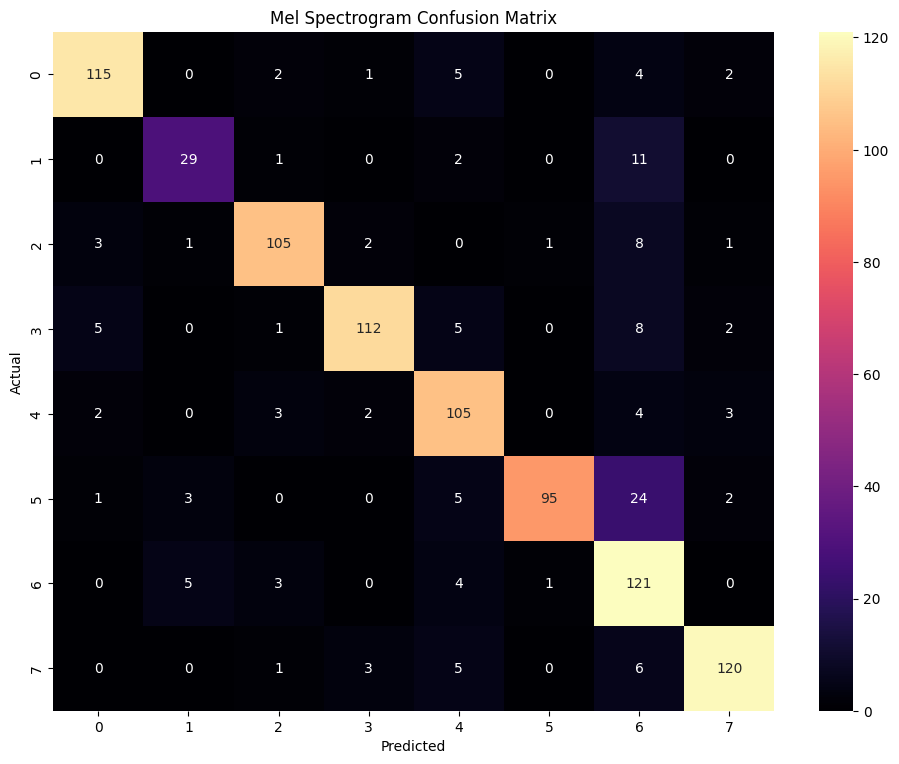

In [ ]:
cm = tf.math.confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
# Make the index and column labels the emotion names
cm = pd.DataFrame(cm.numpy())
sns.heatmap(cm, annot=True, fmt='', cmap='magma')
plt.title('Mel Spectrogram Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout(pad=2)

# CRNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, TimeDistributed

In [ ]:
# Build a CRNN model
model_crnn = tf.keras.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128, 345, 1), padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    # Second convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    # Third convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    # Fourth convolutional layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    # Global average pooling layer averages the values in each feature map into
    # a single value and flattens the result into a (none, 256) array
    tf.keras.layers.GlobalAveragePooling2D(),
    # Reshape layer to convert (none, 256) to (none, 1, 256) as the LSTM layer
    # requires a 3D input
    tf.keras.layers.Reshape((1, 128)),
    # First bidirectional recurrent layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    # Second bidirectional recurrent layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    # Dropout layer randomly sets 50% of the activations to zero
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='softmax')
])

In [ ]:
model_crnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10, restore_best_weights=True, mode = 'min')
lr_scheular = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5,min_lr = 0.000001,mode = 'min')
histor = model_crnn.fit(train_ds,epochs = 30,validation_data = test_ds,callbacks = [early_stopping,lr_scheular])

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.2383 - loss: 1.9321 - val_accuracy: 0.1292 - val_loss: 2.4765 - learning_rate: 0.0010
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.4394 - loss: 1.4792 - val_accuracy: 0.1960 - val_loss: 3.9738 - learning_rate: 0.0010
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.5582 - loss: 1.1799 - val_accuracy: 0.1568 - val_loss: 4.7026 - learning_rate: 0.0010
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.6311 - loss: 1.0066 - val_accuracy: 0.2034 - val_loss: 4.7531 - learning_rate: 0.0010
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.6819 - loss: 0.8759 - val_accuracy: 0.3506 - val_loss: 2.2653 - learning_rate: 0.0010
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.7104 - loss: 0.7834 - val_accuracy: 0.5456 - val_loss: 1.2673 - learning_rate: 0.0010
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.7496 - loss: 0

In [ ]:
model_crnn.save('/content/drive/MyDrive/model_crnn.keras')

In [ ]:
import tensorflow as tf
model_crnn = tf.keras.models.load_model('/content/drive/MyDrive/model_crnn.keras')

In [ ]:
y_pred = model_crnn.predict(X_test)
y_pred = np.argmax(y_pred,axis = 1)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       129
           1       0.69      0.79      0.74        43
           2       0.81      0.87      0.84       121
           3       0.89      0.81      0.85       133
           4       0.82      0.77      0.80       119
           5       0.88      0.89      0.89       130
           6       0.73      0.84      0.78       134
           7       0.93      0.78      0.85       135

    accuracy                           0.84       944
   macro avg       0.83      0.83      0.83       944
weighted avg       0.84      0.84      0.84       944



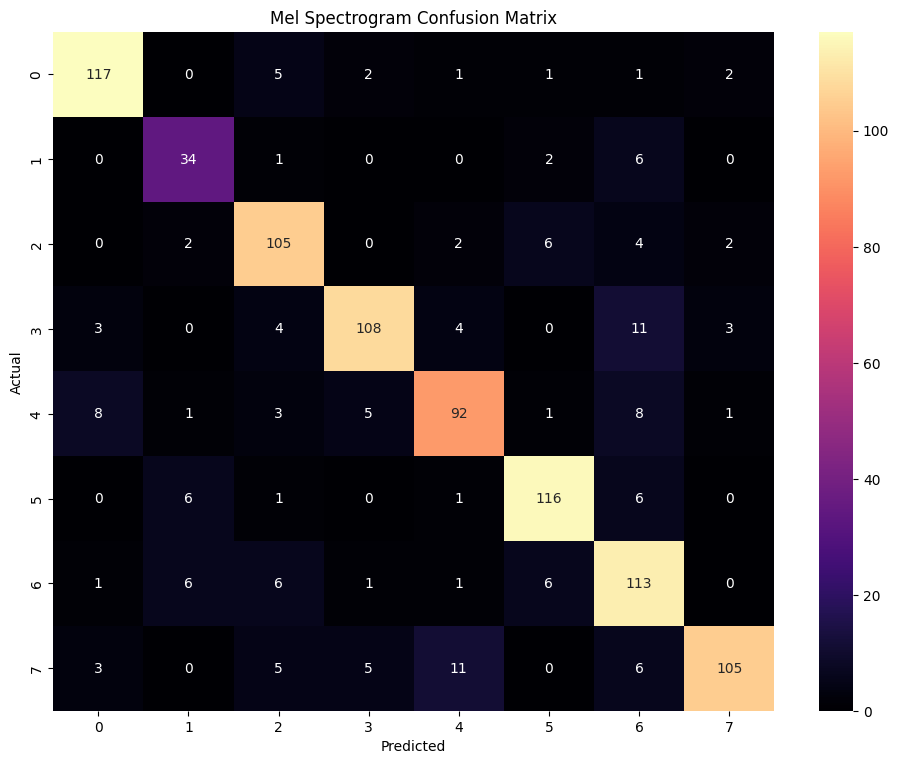

In [ ]:
cm = tf.math.confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
# Make the index and column labels the emotion names
cm = pd.DataFrame(cm.numpy())
sns.heatmap(cm, annot=True, fmt='', cmap='magma')
plt.title('Mel Spectrogram Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout(pad=2)

# 2.Feature Extraction MFCC's

In [31]:
def extract_mfcc(path):
    '''
    Load the audio file, convert the audio file into MFCCs and return the MFCCs
    '''
    # Load the audio file and set the sampling rate to 44100
    audio, sr = librosa.load(path, sr=44100, duration=4, mono=True)
    # Pad the audio files that are less than 4 seconds with zeros at the end
    if len(audio) < 4 * sr:
        audio = np.pad(audio, pad_width=(0, 4 * sr - len(audio)), mode='constant')
    # Convert the audio file into MFCC
    signal = librosa.feature.mfcc(y = audio, sr=sr, n_mfcc=128)
    # Return the MFCCs as a numpy array
    return np.array(signal)

In [32]:
# Divide the data into features and labels
X_mfcc = [extract_mfcc(path) for path in df['Paths']]
y_mfcc = df['Emotions']

In [33]:
np.save('/content/drive/MyDrive/X_mfcc.npy', X_mfcc)

In [34]:
# Divide the data into training and testing sets, with a 80:20 split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_mfcc, y_mfcc,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    shuffle=True)

In [35]:
# Check the length of the training and testing sets
print('Number of training images:', len(X_train_2))
print('Number of testing images:', len(X_test_2))
print('Number of training labels:', len(y_train_2))
print('Number of testing labels:', len(y_test_2))

Number of training images: 3776
Number of testing images: 944
Number of training labels: 3776
Number of testing labels: 944


In [36]:
# Convert the lists into numpy arrays
X_train_2 = np.array(X_train_2)
X_test_2 = np.array(X_test_2)
y_train_2 = np.array(y_train_2)
y_test_2 = np.array(y_test_2)
# Check the shape of the arrays
print('X_train shape:', X_train_2.shape)
print('X_test shape:', X_test_2.shape)
print('y_train shape:', y_train_2.shape)
print('y_test shape:', y_test_2.shape)

X_train shape: (3776, 128, 345)
X_test shape: (944, 128, 345)
y_train shape: (3776,)
y_test shape: (944,)


In [37]:
# Standardize the data by subtracting the mean and dividing by the standard deviation
mean = np.mean(X_train_2)
std = np.std(X_train_2)
X_train_2 = (X_train_2 - mean) / std
X_test_2 = (X_test_2 - mean) / std

In [38]:
# Check the mean and standard deviation
print('Mean:', mean)
print('Standard deviation:', std)
# Check if the data is standardized
print('Mean of standardized data:', np.mean(X_train_2))
print('Standard deviation of standardized data:', np.std(X_train_2))

Mean: -3.7909594
Standard deviation: 54.28706
Mean of standardized data: -2.1678939e-07
Standard deviation of standardized data: 1.000004


In [39]:
# Reshape the data into 4D arrays so that it can be input into the 2D CNN
X_train_2 = X_train_2.reshape(X_train_2.shape[0], 128, 345, 1)
X_test_2 = X_test_2.reshape(X_test_2.shape[0], 128, 345, 1)
# Check the shape of the arrays
print('X_train shape:', X_train_2.shape)
print('X_test shape:', X_test_2.shape)

X_train shape: (3776, 128, 345, 1)
X_test shape: (944, 128, 345, 1)


In [40]:
# Divide the data into batches of 32 images
batch_size = 32
# Make a training dataset from the training set
train_dataset_2 = tf.data.Dataset.from_tensor_slices((X_train_2, y_train_2))
# Shuffle, batch, and prefetch the data
train_dataset_2 = train_dataset_2.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# Make a testing dataset from the testing set
test_dataset_2 = tf.data.Dataset.from_tensor_slices((X_test_2, y_test_2))
# Shuffle, batch, and prefetch the data
test_dataset_2 = test_dataset_2.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [48]:
# Define the CNN model
model_mfcc = tf.keras.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 345, 1), padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Batch normalization maintains the 0 mean and 1 standard deviation
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    # Third convolutional layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    # Fourth convolutional layer
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    # Global average pooling layer averages the values in each feature map into
    # a single value and flattens the result into a (none, 256) array
    tf.keras.layers.GlobalAveragePooling2D(),
    # Dropout layer randomly sets 50% of the activations to zero
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='softmax')
])

In [49]:
# Compile the model
model_mfcc.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
# fit the model
history_mfcc = model_mfcc.fit(train_dataset_2,
                    epochs=30,
                    validation_data=test_dataset_2,
                    callbacks=[early_stopping, lr_scheular])

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.4417 - loss: 1.6548 - val_accuracy: 0.1261 - val_loss: 2.8842 - learning_rate: 0.0010
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.6633 - loss: 1.0391 - val_accuracy: 0.0477 - val_loss: 5.1879 - learning_rate: 0.0010
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.7202 - loss: 0.8645 - val_accuracy: 0.0477 - val_loss: 8.3005 - learning_rate: 0.0010
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.7587 - loss: 0.7600 - val_accuracy: 0.0477 - val_loss: 6.9734 - learning_rate: 0.0010
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.7753 - loss: 0.6895 - val_accuracy: 0.1981 - val_loss: 5.1654 - learning_rate: 0.0010
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.7891 - loss: 0.6317 - val_accuracy: 0.4735 - val_loss: 2.7644 - learning_rate: 0.0010
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.8035 - loss: 0

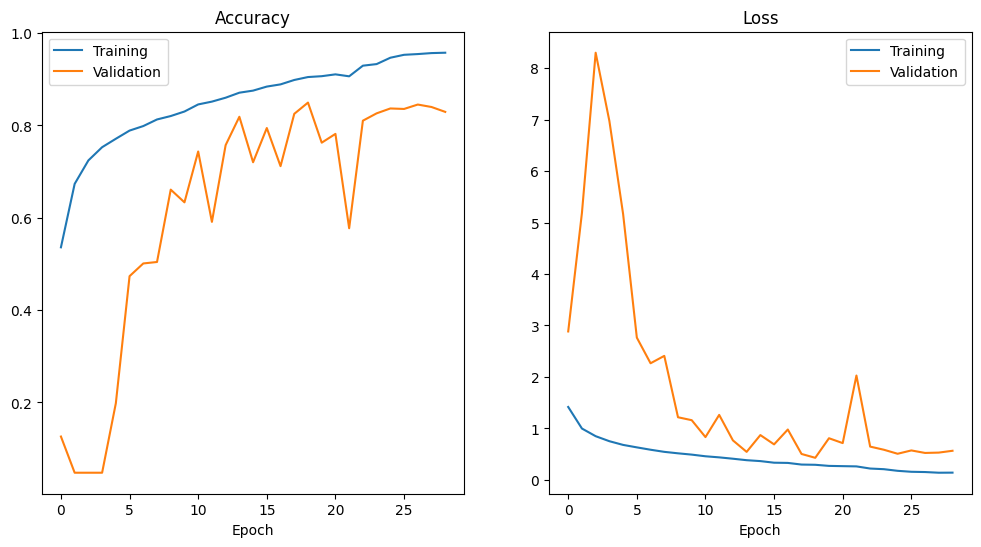

In [51]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_mfcc.history['accuracy'], label='Training')
plt.plot(history_mfcc.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()
# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_mfcc.history['loss'], label='Training')
plt.plot(history_mfcc.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

In [52]:
# Measure the precision and recall
y_pred = model_mfcc.predict(X_test_2)
# Convert the predictions into one-hot encoded vectors
y_pred = np.argmax(y_pred, axis=1)
# Plot the classification report
print(classification_report(y_test_2, y_pred, target_names=encoder.classes_))

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step
              precision    recall  f1-score   support

       anger       0.84      0.92      0.88       129
        calm       0.65      0.80      0.72        45
     disgust       0.93      0.79      0.85       119
        fear       0.80      0.85      0.82       137
   happiness       0.81      0.88      0.84       134
     neutral       0.82      0.89      0.85       125
     sadness       1.00      0.70      0.82       130
    surprise       0.91      0.93      0.92       125

    accuracy                           0.85       944
   macro avg       0.85      0.85      0.84       944
weighted avg       0.86      0.85      0.85       944



30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


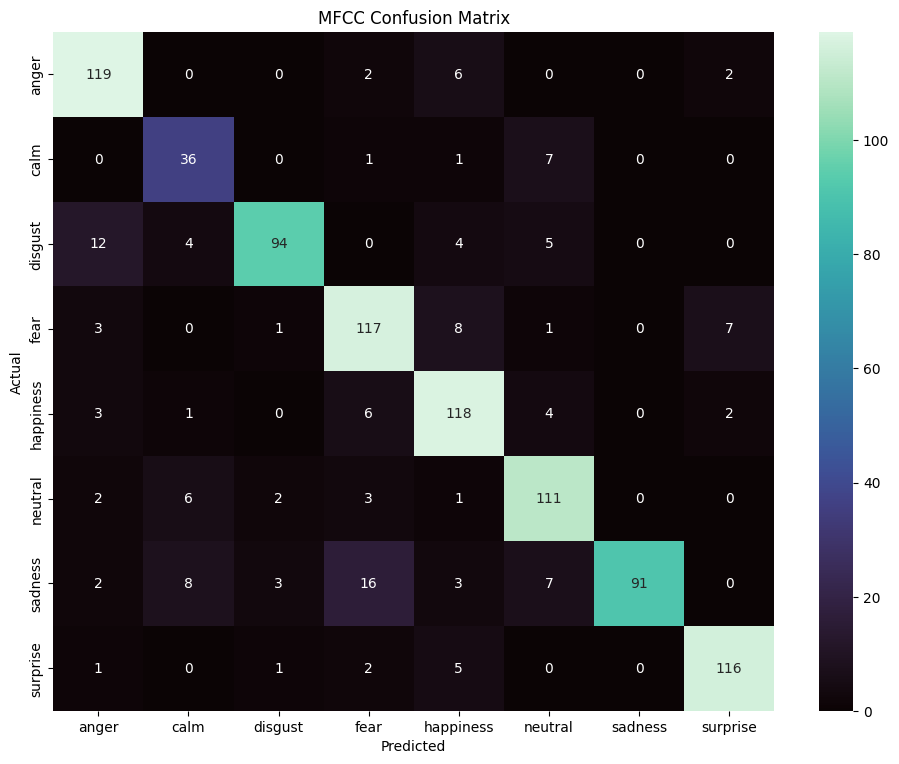

In [53]:
# Plot the confusion matrix for the validation set
# Get the predictions for the test data
y_pred = model_mfcc.predict(X_test_2)
# Convert the predictions into one-hot encoded vectors
y_pred = np.argmax(y_pred, axis=1)
# Get the confusion matrix
cm = tf.math.confusion_matrix(y_test_2, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
# Make the index and column labels the emotion names
cm = pd.DataFrame(cm.numpy(), index=encoder.classes_, columns=encoder.classes_)
sns.heatmap(cm, annot=True, fmt='', cmap='mako')
plt.title('MFCC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout(pad=2)

# CRNN On MFCC's

In [57]:
# Build a CRNN model
model_crnn = tf.keras.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128, 345, 1), padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    # Second convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    # Third convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    # Fourth convolutional layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    # Global average pooling layer averages the values in each feature map into
    # a single value and flattens the result into a (none, 256) array
    tf.keras.layers.GlobalAveragePooling2D(),
    # Reshape layer to convert (none, 256) to (none, 1, 256) as the LSTM layer
    # requires a 3D input
    tf.keras.layers.Reshape((1, 128)),
    # First bidirectional recurrent layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    # Second bidirectional recurrent layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    # Dropout layer randomly sets 50% of the activations to zero
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='softmax')
])

In [58]:
# Compile the model
model_crnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
# fit the model
history_crnn = model_crnn.fit(train_dataset_2,
                    epochs=30,
                    validation_data=test_dataset_2,
                    callbacks=[early_stopping, lr_scheular])

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.2787 - loss: 1.8810 - val_accuracy: 0.1261 - val_loss: 2.9219 - learning_rate: 0.0010
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.4598 - loss: 1.3601 - val_accuracy: 0.0477 - val_loss: 3.2559 - learning_rate: 0.0010
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.5650 - loss: 1.0988 - val_accuracy: 0.0477 - val_loss: 3.4724 - learning_rate: 0.0010
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.6355 - loss: 0.9287 - val_accuracy: 0.0477 - val_loss: 3.6119 - learning_rate: 0.0010
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.7060 - loss: 0.7831 - val_accuracy: 0.1186 - val_loss: 3.0374 - learning_rate: 0.0010
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.7357 - loss: 0.7087 - val_accuracy: 0.1282 - val_loss: 2.6486 - learning_rate: 0.0010
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.7590 - loss: 0

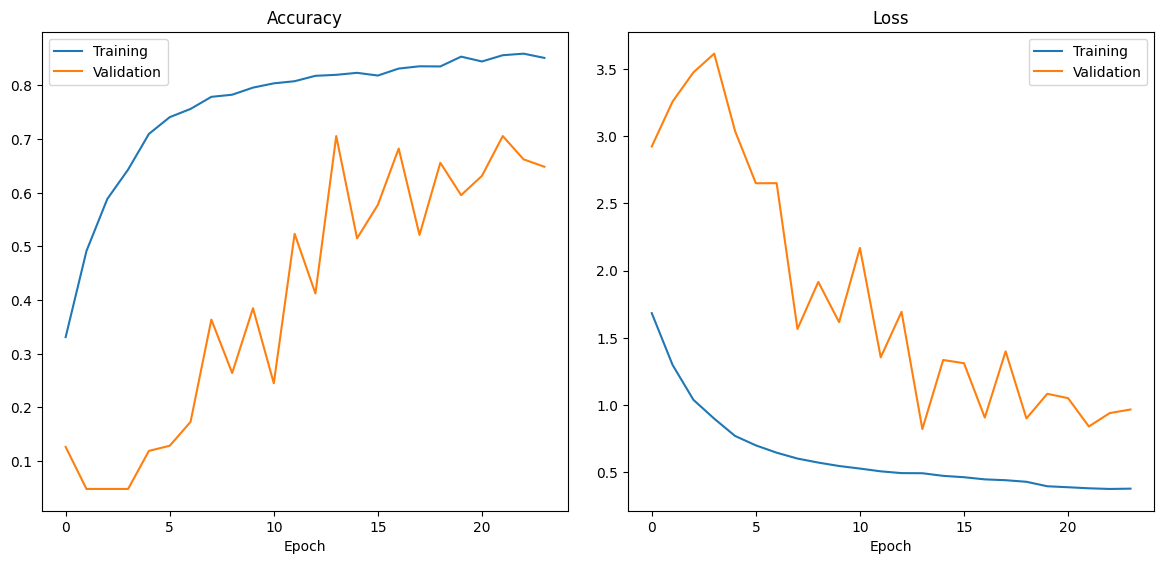

In [62]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_crnn.history['accuracy'], label='Training')
plt.plot(history_crnn.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()
# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_crnn.history['loss'], label='Training')
plt.plot(history_crnn.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout(pad=2)